# Problem Statement
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by 
"National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us 
to perform this prediction.

Constraints on data collection
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage

# Dataset:
https://www.kaggle.com/kumargh/pimaindiansdiabetescsv

# 1. Import Libraries and load dataset

In [ ]:
from google.colab import files
  
uploaded = files.upload()

Saving pima-indians-diabetes.csv to pima-indians-diabetes.csv


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns
import io

In [ ]:
pima_df = pd.read_csv('pima-indians-diabetes.csv')

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number 
of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma 
separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What 
information is available about the data.

# 2. Print 10 samples from the dataset

In [ ]:
pima_df.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# 3. Print the datatypes of each column and the shape of the dataset

In [ ]:
pima_df.shape

(768, 9)

In [ ]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are '0's in the data. Are they really valid '0's or they are missing values? Plasma, BP, skin thickness etc. these values 
cannot be 0. look at column by column logically to understand this.

# 4. Replace all the 0s in the column with the median of the same column value accordingly.

In [ ]:
pima_df.loc[pima_df.Plas == 0, 'Plas'] = pima_df.Plas.median()
pima_df.loc[pima_df.Pres == 0, 'Pres'] = pima_df.Pres.median()
pima_df.loc[pima_df.skin == 0, 'skin'] = pima_df.skin.median()
pima_df.loc[pima_df.test == 0, 'test'] = pima_df.test.median()
pima_df.loc[pima_df.mass == 0, 'mass'] = pima_df.mass.median()

# 5. Print the descriptive statistics of each & every column using describe() function

In [ ]:
pima_df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 6. See the distribution of 'Class' variable and plot it using appropriate graph

In [ ]:
pima_df.groupby("class").agg({'class': 'count'})

,class
class,
0,500
1,268


# 7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables

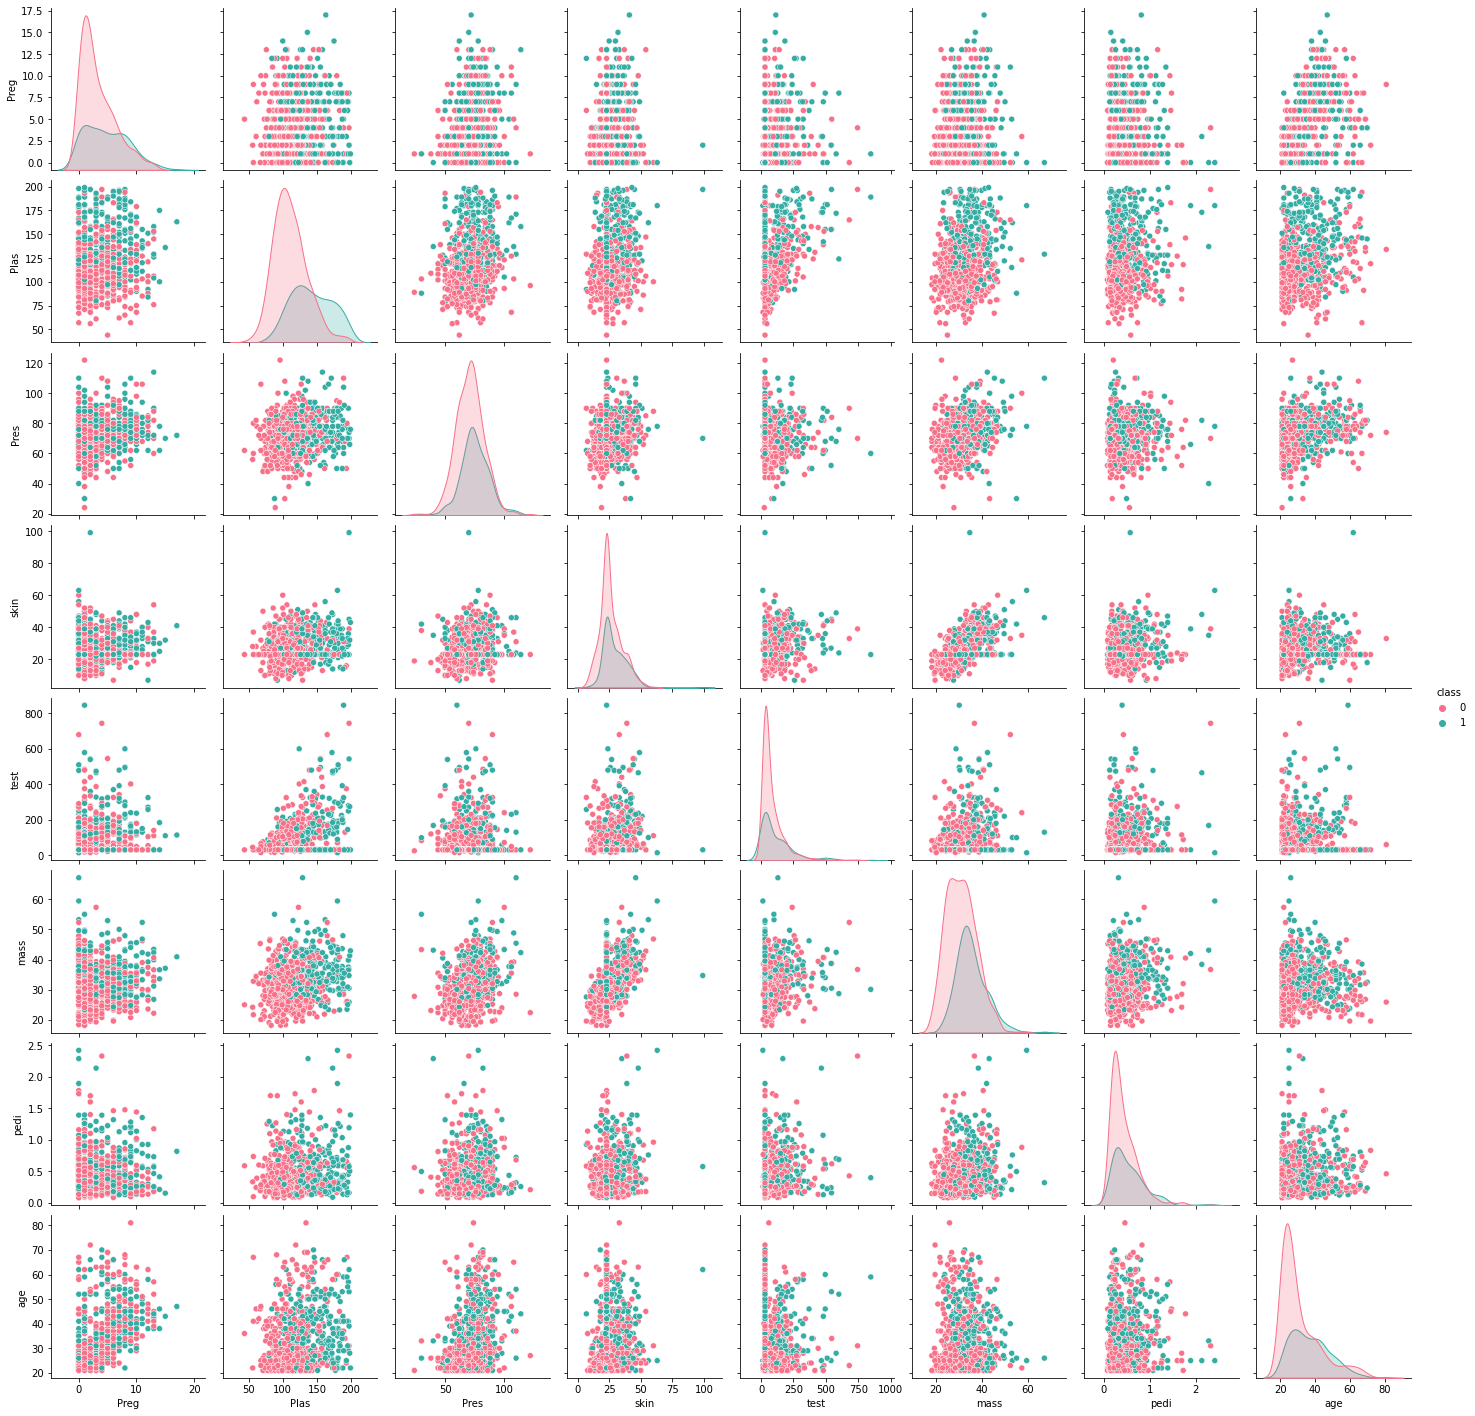

In [ ]:
import seaborn as sns
sns.pairplot(pima_df, hue="class", palette="husl")

In [ ]:
pima_df.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Plas,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
Pres,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
skin,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
test,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
mass,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
pedi,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
class,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


Check for correlation between variables whose values are >0.8

# 8. Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).

In [ ]:
# splitting data into training and test set for independent attributes
n=pima_df['class'].count()
train_set = pima_df.head(int(round(n*0.7))) # Up to the last initial training set row
test_set = pima_df.tail(int(round(n*0.3))) # Past the last initial training set row

# capture the target column ("class") into separate vectors for training set and test set
train_labels = train_set.pop("class")
test_labels = test_set.pop("class")

# 9. Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# 10. Print the accuracy of the model & print the confusion matrix

In [ ]:
dt_model.score(test_set , test_labels)

0.7695652173913043

In [ ]:
test_pred = dt_model.predict(test_set)

In [ ]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = train_set.columns))

           Imp
Preg  0.047242
Plas  0.312040
Pres  0.068836
skin  0.079727
test  0.059217
mass  0.160921
pedi  0.168850
age   0.103168
